In [1]:
import os
import hopsworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv()
    
project = hopsworks.login()
fs = project.get_feature_store()

2025-01-08 17:05:48,645 INFO: Initializing external client
2025-01-08 17:05:48,646 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-01-08 17:05:50,383 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1159324


In [3]:
grailed_items_fg = fs.get_feature_group(
    name='draft_grailed_items',
    version=4,
)

In [4]:
grailed_items_fg.features

[Feature('id', 'bigint', None, True, False, None, None, 1394604),
 Feature('sold_at', 'timestamp', None, False, False, None, None, 1394604),
 Feature('designer_names', 'array<float>', None, False, False, None, None, 1394604),
 Feature('description', 'array<float>', None, False, False, None, None, 1394604),
 Feature('title', 'array<float>', None, False, False, None, None, 1394604),
 Feature('hashtags', 'array<float>', None, False, False, None, None, 1394604),
 Feature('category_path', 'bigint', None, False, False, None, None, 1394604),
 Feature('condition', 'bigint', None, False, False, None, None, 1394604),
 Feature('size', 'array<float>', None, False, False, None, None, 1394604),
 Feature('color', 'bigint', None, False, False, None, None, 1394604),
 Feature('followerno', 'bigint', None, False, False, None, None, 1394604),
 Feature('sold_price', 'bigint', None, False, False, None, None, 1394604)]

In [5]:
# Set seed
np.random.seed(42)

## Create feature view

In [6]:
# Features inspired by https://github.com/kirill-rubashevskiy/graildient-descent/blob/main/notebooks/retrain_best_ml_model.ipynb
features = ['designer_names', 'category_path', 'color', 'condition', 'followerno', 'hashtags', 'description', 'title'] # , 'size']
labels = ['sold_price']

In [7]:
selected_features = grailed_items_fg.select(features + labels)
selected_features.show(10)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (11.37s) 


,designer_names,category_path,color,condition,followerno,hashtags,description,title,sold_price
0,"[0.008455929, 0.0028697923, 0.06372963, -0.034...",2411092262,3896101161,1,1,"[-0.03810654, -0.006580899, 0.01852548, 0.0113...","[-0.03614048, 0.015635908, 0.036675498, -0.022...","[-0.033801984, -0.0314781, 0.024480032, -0.012...",55
1,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,2973695580,2,8,"[0.048452068, -0.001368538, 0.016888341, -0.04...","[-0.033516455, 0.04683744, 0.007957818, 0.0407...","[-0.022699146, 0.008013024, 0.041338712, 0.035...",569
2,"[-0.04072198, -0.0048362296, 0.048269928, 0.00...",309901687,2807742906,2,9,"[-0.08957221, 0.0024209158, -0.0056982324, 0.0...","[-0.03905363, 0.008795027, -0.016913513, 0.014...","[-0.020307204, 0.027977625, 0.010602047, -0.01...",278
3,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,2973695580,3,73,"[-0.052392323, -0.034530703, -0.029495526, -0....","[-0.08783149, 0.023678502, 0.022103464, -0.009...","[-0.030230703, -0.031346425, 0.010791936, 0.01...",800
4,"[-0.0413155, -0.025468638, 0.02902394, -0.0297...",1698257419,3012185078,2,42,"[-0.028539332, 0.011829672, 0.05398404, 0.0019...","[-0.010625219, 0.011431177, 0.00027578892, -0....","[-0.024104822, 0.012512886, 0.033501167, 0.012...",180
5,"[-0.023065727, 0.00799096, 0.047225375, 0.0027...",109869071,3892230005,2,7,"[-0.07543781, -0.017064571, 0.007872403, 0.036...","[-0.06583838, 0.037773512, 0.04039962, -0.0096...","[-0.05441786, -0.013890245, 0.031741533, 0.016...",36
6,"[-0.017075147, 0.007701589, 0.085046604, -0.01...",1698257419,271855843,3,65,"[0.018743245, -0.024017261, -0.006219109, -0.0...","[-0.04980058, 0.027313415, 0.07170434, -0.0307...","[-0.09509616, 0.006928549, 0.010449396, -0.028...",72
7,"[-0.021199932, -0.02255822, 0.06599677, -0.003...",991000826,2973695580,1,2,"[-0.045984022, 0.04901945, 0.04931234, 0.02790...","[-0.051647905, -0.0071153087, 0.010234532, -0....","[-0.0287803, -0.0032674577, 0.0071817385, -0.0...",35
8,"[-0.038397297, 0.02080292, 0.04160584, -0.0728...",109869071,2807742906,2,17,"[-0.04747075, 0.042539764, 0.067541204, -0.058...","[-0.02839256, 0.039140027, 0.05657124, -0.0132...","[-0.04790936, 0.04338459, 0.028106825, -0.0019...",39
9,"[-0.017563483, 0.020716926, 0.11166117, 0.0184...",1797518063,1875972108,2,22,"[-0.021639548, 0.0579892, 0.10188011, 0.004635...","[-0.060781166, 0.001159273, 0.04119494, 0.0105...","[-0.08946444, 0.030398728, 0.08259076, -0.0032...",54


In [8]:
feature_view = fs.get_or_create_feature_view(
    name='grailed_items_fv',
    version=15,
    labels=['sold_price'],
    query=selected_features,
)

In [9]:
X_train, X_test, y_train, y_test = feature_view.train_test_split(test_size=0.2)

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (13.25s) 


In [10]:
X_train

,designer_names,category_path,color,condition,followerno,hashtags,description,title
1,"[0.0010593642, -0.012211309, -0.016578179, -0....",2954578893,2973695580,2,8,"[0.048452068, -0.001368538, 0.016888341, -0.04...","[-0.033516455, 0.04683744, 0.007957818, 0.0407...","[-0.022699146, 0.008013024, 0.041338712, 0.035..."
2,"[-0.04072198, -0.0048362296, 0.048269928, 0.00...",309901687,2807742906,2,9,"[-0.08957221, 0.0024209158, -0.0056982324, 0.0...","[-0.03905363, 0.008795027, -0.016913513, 0.014...","[-0.020307204, 0.027977625, 0.010602047, -0.01..."
4,"[-0.0413155, -0.025468638, 0.02902394, -0.0297...",1698257419,3012185078,2,42,"[-0.028539332, 0.011829672, 0.05398404, 0.0019...","[-0.010625219, 0.011431177, 0.00027578892, -0....","[-0.024104822, 0.012512886, 0.033501167, 0.012..."
5,"[-0.023065727, 0.00799096, 0.047225375, 0.0027...",109869071,3892230005,2,7,"[-0.07543781, -0.017064571, 0.007872403, 0.036...","[-0.06583838, 0.037773512, 0.04039962, -0.0096...","[-0.05441786, -0.013890245, 0.031741533, 0.016..."
6,"[-0.017075147, 0.007701589, 0.085046604, -0.01...",1698257419,271855843,3,65,"[0.018743245, -0.024017261, -0.006219109, -0.0...","[-0.04980058, 0.027313415, 0.07170434, -0.0307...","[-0.09509616, 0.006928549, 0.010449396, -0.028..."
...,...,...,...,...,...,...,...,...
7803,"[-0.009688312, 0.03334644, 0.04908745, -0.0084...",1029848856,1342527457,2,49,"[-0.032998145, -0.036418196, 0.07930242, -0.07...","[-0.055753235, -0.0005795148, 0.045928523, -0....","[-0.02029249, -0.02305721, 0.029204007, -0.037..."
7804,"[-0.02314716, 0.0043542515, 0.060766295, -0.04...",952279238,2725627584,1,6,"[-0.02879102, 0.017957563, -0.00433874, -0.017...","[-0.056892145, 0.0055695814, 0.03623551, 0.006...","[-0.1055131, 0.024006896, 0.056699973, -0.0257..."
7805,"[0.041941233, -0.032999046, -0.0069308546, -0....",1235121493,2725627584,1,9,"[0.031959753, -0.040663913, 0.020545555, 0.008...","[-0.014676985, 0.046265285, 0.064487755, -0.00...","[-0.025384273, 0.00887712, 0.05178767, 0.02213..."
7806,"[-0.037526954, -0.018776597, 0.01180262, -0.00...",3149754448,2944750459,3,12,"[-0.038714863, -0.017132593, 0.009105853, -0.0...","[-0.040701654, 0.022409977, 0.0068460074, -0.0...","[-0.050262235, 0.018510697, 0.019715613, -0.01..."


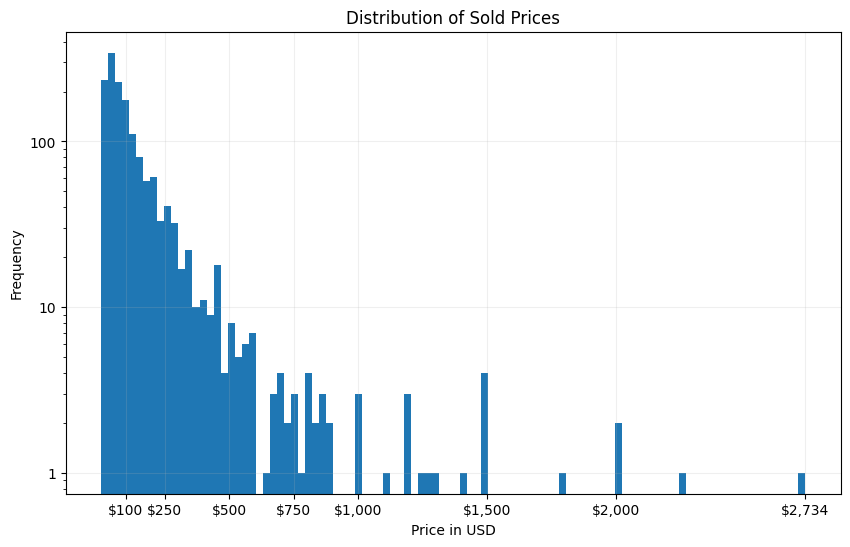

In [11]:
# Plot distribution of sold_prices
plt.figure(figsize=(10, 6))
y_test['sold_price'].plot(kind='hist', bins=100, log=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Sold Prices')
plt.grid(True, alpha=0.2)
plt.xticks([100, 250, 500, 750, 1000, 1500, 2000, y_test['sold_price'].max()])

plt.show()

## Create a predictive model

Candidates include: XGBoost, CatBoost (handles categorical features natively), KNN or a neural net.

In [12]:
from catboost import CatBoostRegressor, Pool

embedding_features= ['designer_names', 'description', 'title', 'hashtags'] #, 'size']

model = CatBoostRegressor(
    embedding_features=embedding_features,
    iterations=1000, # Number of trees
    # learning_rate=0.05,
    # depth=6, 
    loss_function='LogCosh', # LogCosh or RMSE
    verbose=100  # Print training progress every 100 iterations
)

# Create CatBoost Pool objects
train_pool = Pool(
    data=X_train,
    label=y_train,
    embedding_features=embedding_features,
)

test_pool = Pool(
    data=X_test,
    label=y_test,
    embedding_features=embedding_features,
)

# Train the model
model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50 # Stop early if we are overfitting
)

0:	learn: 155.9735846	test: 142.2157311	best: 142.2157311 (0)	total: 55ms	remaining: 54.9s
100:	learn: 88.6251249	test: 80.8110890	best: 80.8110890 (100)	total: 657ms	remaining: 5.84s
200:	learn: 84.2325966	test: 80.0169710	best: 80.0169710 (200)	total: 1.26s	remaining: 5.03s
300:	learn: 81.6030736	test: 79.9576506	best: 79.7928890 (250)	total: 1.83s	remaining: 4.25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 79.79288899
bestIteration = 250

Shrink model to first 251 iterations.


In [13]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

y_pred = model.predict(X_test)
reshaped_y_test = y_test.iloc[:,0]

# MSE
mse = mean_squared_error(reshaped_y_test, y_pred)
print("MSE:", mse)

# RMSLE
rmsle = np.sqrt(mean_squared_log_error(reshaped_y_test, y_pred))
print("RMSLE:", rmsle)

# R squared
r2 = r2_score(reshaped_y_test, y_pred)
print("R squared:", r2)

MSE: 32543.339686203344
RMSLE: 0.7526673233900991
R squared: 0.27350697699636817


Best RMSLE on this problem: 0.64 (https://github.com/kirill-rubashevskiy/graildient-descent/blob/main/README.md)

### "Outdated" models

In [14]:
# import numpy as np
# from xgboost import XGBRegressor

# # Convert the embeddings column into a numpy array of separate columns
# X_train_array = np.vstack(X_train['designers_title_embedding'].to_numpy())
# X_test_array = np.vstack(X_test['designers_title_embedding'].to_numpy())

# # Now train the model with the reshaped data
# xgb_regressor = XGBRegressor()
# xgb_regressor.fit(X_train_array, y_train)

In [15]:
# from sklearn.neighbors import KNeighborsRegressor
# knn_reg = KNeighborsRegressor(n_neighbors=5)
# knn_reg.fit(X_train_array, y_train)

## Evaluate model

In [16]:
predicted_df = y_test.copy()
predicted_df['predicted_price'] = y_pred
predicted_df

,sold_price,predicted_price
0,55,105.531048
3,800,398.032013
12,100,28.237136
14,56,52.898678
18,360,252.455130
...,...,...
7761,72,51.379932
7769,60,115.004979
7772,320,241.945903
7773,81,94.865257


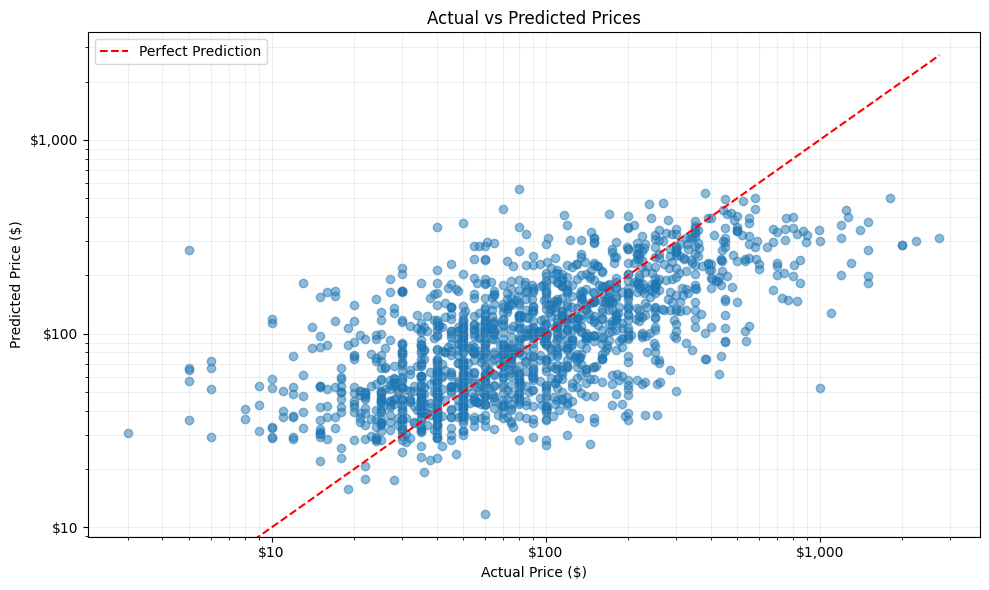

In [17]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(predicted_df['sold_price'], predicted_df['predicted_price'], alpha=0.5)

# Add diagonal line representing perfect predictions
max_val = max(predicted_df['sold_price'].max(), predicted_df['predicted_price'].max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')

# Set log scale with dollar formatting
plt.xscale('log')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Labels and title
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Add grid for better readability
plt.grid(True, which="both", ls="-", alpha=0.2)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

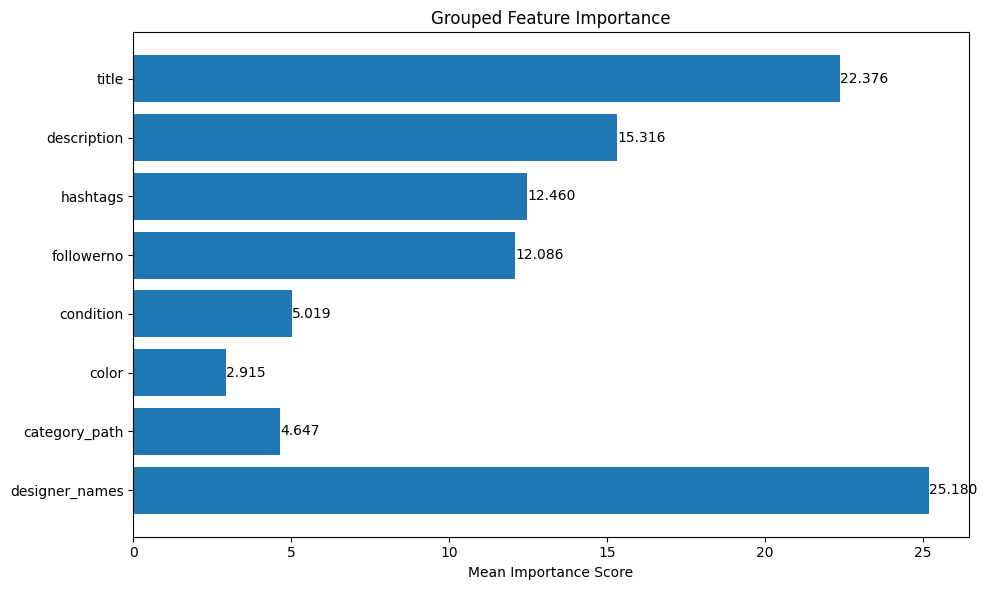

In [18]:
def plot_grouped_feature_importance(model, X_test, original_feature_names=features, embedding_prefix='embedding_'):
    # Get feature importance scores
    feature_importance = model.get_feature_importance()

    # Create the plot
    fig, ax = plt.figure(figsize=(10, 6)), plt.axes()
    
    # Plot horizontal bar chart
    y_pos = np.arange(len(feature_importance))
    ax.barh(y_pos, list(feature_importance))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    
    plt.title('Grouped Feature Importance')
    plt.xlabel('Mean Importance Score')
    
    # Add value labels on the bars
    for i, v in enumerate(feature_importance):
        ax.text(v, i, f'{v:.3f}', va='center')
    
    plt.tight_layout()
    return plt

# Usage:
plot_grouped_feature_importance(model, X_test)
plt.show()

## Model registry

### Save locally

In [19]:
# Creating a directory for the model artifacts if it doesn't exist
model_dir = "price_predictor_model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [20]:
# Save the model locally
model.save_model(model_dir + "/model.json")

### Save to modal registry

In [21]:
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

input_example = {}
for col in X_test.columns:
    sample_value = X_test[col].iloc[0]
    if isinstance(sample_value, (list, np.ndarray)):
        # Convert embedding to a simple list of floats
        input_example[col] = [float(x) for x in sample_value]
    else:
        # For regular columns, convert to basic Python types
        value = sample_value
        if isinstance(value, (np.int64, np.int32)):
            value = int(value)
        elif isinstance(value, (np.float64, np.float32)):
            value = float(value)
        input_example[col] = value

# Creating input and output schemas
input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema=input_schema, output_schema=output_schema)

In [22]:
model_schema

ModelSchema(input: 'columnar', output: 'columnar')

In [23]:
res_dict = { 
    "MSE": str(mse),
    "RMSLE": str(rmsle),
    "R squared": str(r2),
}

In [24]:
mr = project.get_model_registry()

In [25]:
grailed_model = mr.python.create_model(
    name="grailed_prediction_catboost_model", 
    metrics=res_dict,
    model_schema=model_schema,
    # input_example=X_test.sample().values, # Bugged
    description="Grailed (fashion) price predictor",
)

In [26]:
grailed_model.save(model_dir)

  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/39935872 elapsed<00:00 remaining<?

Uploading: 0.000%|          | 0/751 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1159324/models/grailed_prediction_catboost_model/4


Model(name: 'grailed_prediction_catboost_model', version: 4)